# COMP5318 Assignment 2: Image Classification

### Group number: ...  , SID1: ... , SID2: ...  

This notebook includes the code to load the Fashion-MNIST dataset using Keras, and a skeleton for the main sections that should be included in the notebook. Please see the assignment specification for more detail. You may wish to add extra subsections where appropriate. 

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## 1. Data loading, preprocessing, and exploration
We have included the code to load the dataset below. Please proceed with your data exploration and preprocessing steps, including creating any relevant data subsets required. The documentation for the data loading function can be accessed [here](https://keras.io/api/datasets/fashion_mnist/).

In [2]:
# Load the Fashion-MNIST dataset training and test sets as numpy arrays
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
# An ordered list of the class names
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
              ]

## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

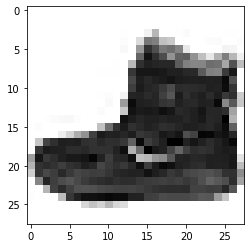

In [4]:
#keep models appropriately small
number=10000
X_train = X_train[0:number]
y_train = y_train[0:number]

#check the image
def show_single_image(img_dir):
    plt.imshow(img_dir, cmap="binary")
    plt.show()

show_single_image(X_train[0])



In [5]:
X_train = X_train.reshape(number, 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

In [6]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy on test set: 0.81


### Fully connected neural network

In [40]:

# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Scale the data to the range 0-1
X_train /= 255
X_test /= 255



In [41]:
model = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=784),
    
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])

In [42]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [10]:
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 1s 6ms/step - loss: 1.7857 - accuracy: 0.2933 - val_loss: 1.2490 - val_accuracy: 0.5982
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 1.4708 - accuracy: 0.4217 - val_loss: 0.8898 - val_accuracy: 0.7400
Epoch 3/10
79/79 [==============================] - 0s 3ms/step - loss: 1.3143 - accuracy: 0.5048 - val_loss: 0.7878 - val_accuracy: 0.7798
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 1.2757 - accuracy: 0.5068 - val_loss: 0.7742 - val_accuracy: 0.7733
Epoch 5/10
79/79 [==============================] - 0s 4ms/step - loss: 1.2361 - accuracy: 0.5236 - val_loss: 0.7023 - val_accuracy: 0.7833
Epoch 6/10
79/79 [==============================] - 0s 3ms/step - loss: 1.1810 - accuracy: 0.5360 - val_loss: 0.6762 - val_accuracy: 0.7840
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 1.1712 - accuracy: 0.5319 - val_loss: 0.6856 - val_accuracy: 0.7903
Epoch 8/10
79/79 [==

In [43]:
# Evaluate the classifier on the test data.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 1ms/step - loss: 2.3025 - accuracy: 0.0903
Accuracy on test data: 0.0903


<AxesSubplot:>

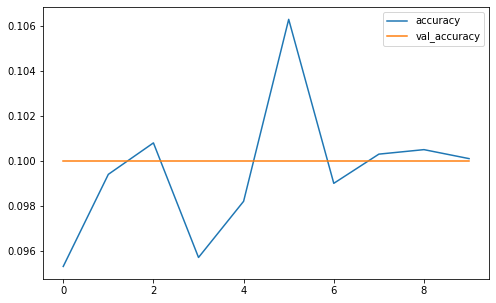

In [45]:
import pandas as pd
# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
accuracies.plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0.5, 1)
# plt.xlabel('Epoch')
# plt.show()

### Convolutional neural network

In [13]:
model = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=784),
    
    #reshape tensor
    keras.layers.Reshape((28,28,1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [15]:
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 4s 42ms/step - loss: 1.2394 - accuracy: 0.5635 - val_loss: 0.7155 - val_accuracy: 0.7417
Epoch 2/10
79/79 [==============================] - 3s 40ms/step - loss: 0.6862 - accuracy: 0.7494 - val_loss: 0.5979 - val_accuracy: 0.7854
Epoch 3/10
79/79 [==============================] - 4s 51ms/step - loss: 0.5829 - accuracy: 0.7843 - val_loss: 0.5494 - val_accuracy: 0.8017
Epoch 4/10
79/79 [==============================] - 4s 50ms/step - loss: 0.5384 - accuracy: 0.8014 - val_loss: 0.5086 - val_accuracy: 0.8171
Epoch 5/10
79/79 [==============================] - 3s 43ms/step - loss: 0.5070 - accuracy: 0.8158 - val_loss: 0.4828 - val_accuracy: 0.8271
Epoch 6/10
79/79 [==============================] - 4s 47ms/step - loss: 0.4885 - accuracy: 0.8230 - val_loss: 0.4662 - val_accuracy: 0.8349
Epoch 7/10
79/79 [==============================] - 3s 42ms/step - loss: 0.4719 - accuracy: 0.8293 - val_loss: 0.4558 - val_accuracy: 0.8367
Epoch 8/10
79

In [16]:
# Evaluate the classifier on the test data.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4304 - accuracy: 0.8486
Accuracy on test data: 0.8486


## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[2,3,4,5,6,7]}
knn2 = KNeighborsClassifier()
estimator=GridSearchCV(knn2,param_grid=param_grid,cv=10)
estimator.fit(X_train, y_train)
print("Accuracy on test set: {:.4f}".format(estimator.score(X_test, y_test)))

Accuracy on test set: 0.8215


In [18]:
print(estimator.best_score_,estimator.best_params_)

0.825 {'n_neighbors': 6}


### Fully connected neural network

In [19]:
def build_mlp(n_hidden_layers=3, n_hidden_neurons=50, activation_function="relu"):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_hidden_neurons,activation=activation_function, input_shape=(784,)))
    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, activation=activation_function))
    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

In [20]:
from scikeras.wrappers import KerasClassifier
keras_classifier = KerasClassifier(build_mlp,
                                   n_hidden_layers=2,
#                                    n_hidden_neurons=50,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="sgd",
                                   optimizer__lr=0.01,
                                   metrics=["accuracy"]
                                  )

In [21]:
param_grid = {
#     "n_hidden_neurons": [100, 200],
    "optimizer__lr": [0.1, 0.01, 0.001],
    "activation_function": ["relu", "tanh",None]
}
grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=2)
grid_search_cv.fit(X_train, y_train, epochs=2)

/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/2
157/157 [==============================] - 0s 1ms/step - loss: 1.1869 - accuracy: 0.5684
Epoch 2/2
157/157 [==============================] - 0s 595us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 920us/step - loss: 1.1805 - accuracy: 0.5716
Epoch 2/2
157/157 [==============================] - 0s 612us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 891us/step - loss: 1.9619 - accuracy: 0.3372
Epoch 2/2
157/157 [==============================] - 0s 656us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 989us/step - loss: 1.8972 - accuracy: 0.3804
Epoch 2/2
157/157 [==============================] - 0s 613us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 952us/step - loss: 2.2647 - accuracy: 0.1468
Epoch 2/2
157/157 [==============================] - 0s 696us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 919us/step - loss: 2.3126 - accuracy: 0.1028
Epoch 2/2
157/157 [==============================] - 0s 789us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 1ms/step - loss: 0.9424 - accuracy: 0.6618
Epoch 2/2
157/157 [==============================] - 0s 753us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 900us/step - loss: 0.9112 - accuracy: 0.6758
Epoch 2/2
157/157 [==============================] - 0s 597us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 1ms/step - loss: 1.5447 - accuracy: 0.5246
Epoch 2/2
157/157 [==============================] - 0s 626us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 916us/step - loss: 1.6793 - accuracy: 0.4984
Epoch 2/2
157/157 [==============================] - 0s 675us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 990us/step - loss: 2.2649 - accuracy: 0.2058
Epoch 2/2
157/157 [==============================] - 0s 638us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 933us/step - loss: 2.1992 - accuracy: 0.1988
Epoch 2/2
157/157 [==============================] - 0s 629us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 917us/step - loss: 1.3335 - accuracy: 0.5920
Epoch 2/2
157/157 [==============================] - 0s 632us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 945us/step - loss: nan - accuracy: 0.0958
Epoch 2/2
157/157 [==============================] - 0s 654us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 932us/step - loss: 1.2042 - accuracy: 0.6148
Epoch 2/2
157/157 [==============================] - 0s 810us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 1ms/step - loss: 1.2548 - accuracy: 0.5738
Epoch 2/2
157/157 [==============================] - 0s 804us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 987us/step - loss: 2.0659 - accuracy: 0.2434
Epoch 2/2
157/157 [==============================] - 0s 643us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 [==============================] - 0s 1ms/step - loss: 2.0978 - accuracy: 0.2698
Epoch 2/2
157/157 [==============================] - 0s 676us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 1ms/step - loss: 0.7479 - accuracy: 0.7286
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.8079


GridSearchCV(cv=2,
             estimator=KerasClassifier(activation_function='relu', loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_mlp at 0x7fdc55431430>, n_hidden_layers=2, optimizer='sgd', optimizer__lr=0.01),
             param_grid={'activation_function': ['relu', 'tanh', None],
                         'optimizer__lr': [0.1, 0.01, 0.001]})

In [22]:
print("Accuracy on test set: {:.4f}".format(grid_search_cv.score(X_test, y_test)))

313/313 [==============================] - 0s 1ms/step
Accuracy on test set: 0.7673


In [23]:
print(grid_search_cv.best_score_, grid_search_cv.best_params_)

0.7689 {'activation_function': 'tanh', 'optimizer__lr': 0.1}


In [24]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.68792391, 0.63219309, 0.64731145, 0.64176059, 0.6354785 ,
        0.63243949, 0.6222204 , 0.66818094, 0.68617725]),
 'std_fit_time': array([0.05693102, 0.01622009, 0.00667453, 0.01693559, 0.01378036,
        0.00779068, 0.0005554 , 0.04719687, 0.01792717]),
 'mean_score_time': array([0.18512869, 0.16959453, 0.19010448, 0.17723453, 0.30800605,
        0.17096162, 0.17318153, 0.20115757, 0.17747283]),
 'std_score_time': array([0.01603341, 0.00444341, 0.00405955, 0.0135144 , 0.13814425,
        0.00174928, 0.00188947, 0.00158954, 0.00349879]),
 'param_activation_function': masked_array(data=['relu', 'relu', 'relu', 'tanh', 'tanh', 'tanh', None,
                    None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_optimizer__lr': masked_array(data=[0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
              mask=[False, False, Fa

### Convolutional neural network

In [25]:
def build_cnn(kernel_size=3, strides=2, lr=0.001):
    model = keras.models.Sequential()
    # Specify the input shape
    model.add(keras.Input(shape=784))
    
    #reshape tensor
    model.add(keras.layers.Reshape((28,28,1)))
    model.add(keras.layers.Conv2D(16, kernel_size=kernel_size, strides=strides, activation='relu'))
    # model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, kernel_size=kernel_size, strides=strides, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation="softmax"))
    # model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])
    return model

In [26]:
cnn_model = KerasClassifier(build_fn=build_cnn,kernel_size=2,
                  strides=2, lr=0.001)


In [27]:
param_grid = {
    "kernel_size": [2, 3],
    "lr": [0.1,0.01, 0.001],
    "strides": [2, 4]
}
grid_search_cv = GridSearchCV(cnn_model, param_grid, cv=2)
grid_search_cv.fit(X_train, y_train, epochs=2)

/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/2
157/157 [==============================] - 1s 3ms/step - loss: 1.5388 - accuracy: 0.4516
Epoch 2/2
157/157 [==============================] - 0s 1ms/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 2.3240 - accuracy: 0.0948
Epoch 2/2
157/157 [==============================] - 0s 914us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 0s 1ms/step - loss: 2.3229 - accuracy: 0.0992
Epoch 2/2
157/157 [==============================] - 0s 618us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 0s 1ms/step - loss: 1.5590 - accuracy: 0.4066
Epoch 2/2
157/157 [==============================] - 0s 612us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 3ms/step - loss: 0.9877 - accuracy: 0.6502
Epoch 2/2
157/157 [==============================] - 0s 897us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 0.9297 - accuracy: 0.6642
Epoch 2/2
157/157 [==============================] - 0s 923us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 0s 1ms/step - loss: 1.4345 - accuracy: 0.4878
Epoch 2/2
157/157 [==============================] - 0s 637us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 0s 1ms/step - loss: 1.4752 - accuracy: 0.4640
Epoch 2/2
157/157 [==============================] - 0s 608us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.7118 - accuracy: 0.4082
Epoch 2/2
157/157 [==============================] - 0s 910us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.7091 - accuracy: 0.4098
Epoch 2/2
157/157 [==============================] - 0s 871us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 1ms/step - loss: 2.0811 - accuracy: 0.3358
Epoch 2/2
157/157 [==============================] - 0s 607us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 0s 1ms/step - loss: 2.0375 - accuracy: 0.2914
Epoch 2/2
157/157 [==============================] - 0s 592us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 3ms/step - loss: 1.2971 - accuracy: 0.5468
Epoch 2/2
157/157 [==============================] - 0s 883us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 2.3958 - accuracy: 0.0996
Epoch 2/2
157/157 [==============================] - 0s 853us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 2.0257 - accuracy: 0.2238
Epoch 2/2
157/157 [==============================] - 0s 840us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 2.3263 - accuracy: 0.1006
Epoch 2/2
157/157 [==============================] - 0s 675us/step


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/2
157/157 [==============================] - 1s 4ms/step - loss: 0.9364 - accuracy: 0.6588
Epoch 2/2
157/157 [==============================] - 0s 868us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 3ms/step - loss: 0.8845 - accuracy: 0.6776
Epoch 2/2
157/157 [==============================] - 0s 850us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.2067 - accuracy: 0.5486
Epoch 2/2
157/157 [==============================] - 0s 616us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.2524 - accuracy: 0.5282
Epoch 2/2
157/157 [==============================] - 0s 621us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 3ms/step - loss: 1.4686 - accuracy: 0.4862
Epoch 2/2
157/157 [==============================] - 0s 899us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.4478 - accuracy: 0.4966
Epoch 2/2
157/157 [==============================] - 0s 867us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.8328 - accuracy: 0.3288
Epoch 2/2
157/157 [==============================] - 0s 636us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


157/157 [==============================] - 1s 2ms/step - loss: 1.8277 - accuracy: 0.3492
Epoch 2/2
157/157 [==============================] - 0s 727us/step
Epoch 1/2


/Users/jiangyiwei/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step - loss: 0.7485 - accuracy: 0.7280
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.8097


GridSearchCV(cv=2,
             estimator=KerasClassifier(build_fn=<function build_cnn at 0x7fdc5940b550>, kernel_size=2, lr=0.001, strides=2),
             param_grid={'kernel_size': [2, 3], 'lr': [0.1, 0.01, 0.001],
                         'strides': [2, 4]})

In [28]:
print(grid_search_cv.best_score_, grid_search_cv.best_params_)

0.804 {'kernel_size': 3, 'lr': 0.01, 'strides': 2}


In [29]:
grid_search_cv.cv_results_

{'mean_fit_time': array([1.21623862, 0.75937676, 1.37372696, 0.75877893, 1.13100898,
        0.76986158, 1.217623  , 1.04638147, 1.55129898, 1.0285604 ,
        1.20983589, 1.06208003]),
 'std_fit_time': array([0.08827937, 0.00928044, 0.20880997, 0.01012909, 0.03512704,
        0.00386155, 0.02654195, 0.0264926 , 0.34843814, 0.04193759,
        0.02805007, 0.00523007]),
 'mean_score_time': array([0.23241806, 0.17151237, 0.22097862, 0.17361593, 0.21610701,
        0.16972148, 0.21176398, 0.20533693, 0.21064746, 0.17282605,
        0.21522295, 0.18456745]),
 'std_score_time': array([0.0038631 , 0.00055838, 0.00146163, 0.00300193, 0.00519288,
        0.00010765, 0.00276196, 0.01693809, 0.00264752, 0.00015593,
        0.00319088, 0.00607944]),
 'param_kernel_size': masked_array(data=[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obje

## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

In [30]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy on test set: 0.82


### Fully connected neural network

In [48]:
def build_mlp(n_hidden_layers=3, n_hidden_neurons=50, activation_function="tanh"):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_hidden_neurons,activation=activation_function, input_shape=(784,)))
    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, activation=activation_function))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics=['accuracy'])
    return model

In [52]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((10000, 784), (10000,), (10000, 784), (10000,))

In [53]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backc

In [49]:
model = build_mlp()
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 1s 4ms/step - loss: 2.3033 - accuracy: 0.1038 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 2.3025 - accuracy: 0.1047 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 3/10
79/79 [==============================] - 0s 3ms/step - loss: 2.3025 - accuracy: 0.1090 - val_loss: 2.3021 - val_accuracy: 0.1000
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 2.3011 - accuracy: 0.1105 - val_loss: 2.3002 - val_accuracy: 0.1000
Epoch 5/10
79/79 [==============================] - 0s 3ms/step - loss: 2.3001 - accuracy: 0.1108 - val_loss: 2.3004 - val_accuracy: 0.1000
Epoch 6/10
79/79 [==============================] - 0s 3ms/step - loss: 2.2986 - accuracy: 0.1084 - val_loss: 2.2984 - val_accuracy: 0.1000
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 2.2971 - accuracy: 0.1282 - val_loss: 2.2959 - val_accuracy: 0.1075
Epoch 8/10
79/79 [==

In [34]:
# Evaluate the classifier on the test data.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 2.4478 - accuracy: 0.1000
Accuracy on test data: 0.1000


### Convolutional neural network

In [35]:
def build_cnn(kernel_size=3, strides=2, lr=0.01):
    model = keras.models.Sequential()
    # Specify the input shape
    model.add(keras.Input(shape=784))
    
    #reshape tensor
    model.add(keras.layers.Reshape((28,28,1)))
    model.add(keras.layers.Conv2D(16, kernel_size=kernel_size, strides=strides, activation='relu'))
    # model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, kernel_size=kernel_size, strides=strides, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation="softmax"))
    # model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])
    return model

In [36]:

batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 0s 4ms/step - loss: 2.4782 - accuracy: 0.0953 - val_loss: 2.6165 - val_accuracy: 0.1000
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 2.4678 - accuracy: 0.0994 - val_loss: 2.8635 - val_accuracy: 0.1000
Epoch 3/10
79/79 [==============================] - 0s 3ms/step - loss: 2.5930 - accuracy: 0.1008 - val_loss: 2.5498 - val_accuracy: 0.1000
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 2.4794 - accuracy: 0.0957 - val_loss: 2.5282 - val_accuracy: 0.1000
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 2.5046 - accuracy: 0.0982 - val_loss: 2.5479 - val_accuracy: 0.1000
Epoch 6/10
79/79 [==============================] - 0s 3ms/step - loss: 2.4683 - accuracy: 0.1063 - val_loss: 2.6823 - val_accuracy: 0.1000
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 2.4745 - accuracy: 0.0990 - val_loss: 2.4633 - val_accuracy: 0.1000
Epoch 8/10
79/79 [==

In [37]:
# Evaluate the classifier on the test data.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 974us/step - loss: 2.7949 - accuracy: 0.1000
Accuracy on test data: 0.1000
